In [143]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [201]:
cli_df = pd.read_csv('../datasets/output/cli_processed.csv')
pmi_df = pd.read_csv('../datasets/output/pmi_processed.csv')
gdp_df = pd.read_csv('../datasets/output/gdp_processed.csv')
unemp_df = pd.read_csv('../datasets/output/unemployed_processed.csv')
sibor_df = pd.read_csv('../datasets/output/sibor_processed.csv')
cpf_df = pd.read_csv('../datasets/output/cpf_processed.csv')
cpi_df = pd.read_csv('../datasets/output/cpi_processed.csv')
married_df = pd.read_csv('../datasets/output/married_processed.csv')
hdb_index_df = pd.read_csv('../datasets/output/hdb_index_processed.csv')
pte_index_df = pd.read_csv('../datasets/output/pte_index_processed.csv')
pop_df = pd.read_csv('../datasets/output/pop_processed.csv')
income_df = pd.read_csv('../datasets/output/income_processed.csv')
bto_df = pd.read_csv('../datasets/output/bto_flat_processed.csv')
new_pte_df = pd.read_csv('../datasets/output/new_pte_home_yr.csv')

### Monthly Median Income

In [232]:
income_df.set_index('date',inplace=True)

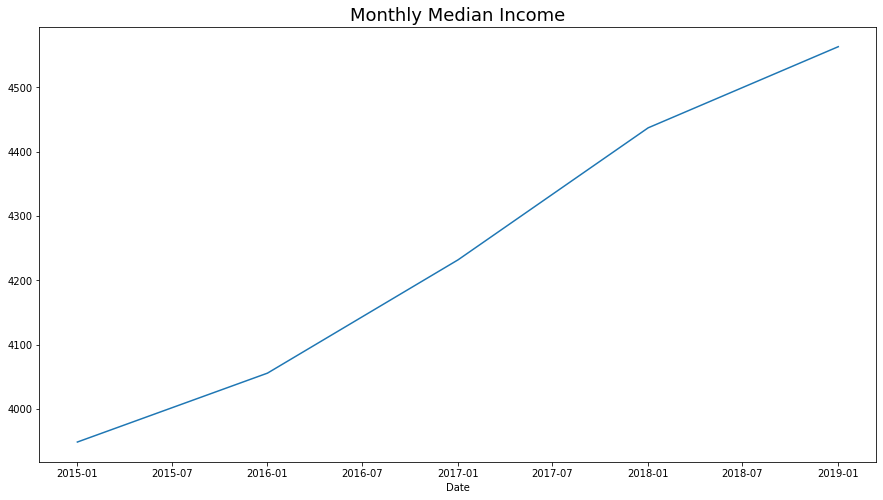

In [235]:
plt.figure(figsize=(15,8))
plt.plot(income_df[income_df['year']>2014]['mth_income'])
plt.xlabel('Date')
plt.title(label = 'Monthly Median Income', fontsize=18)
plt.show();

### Total and Married Residents

In [228]:
married_df.set_index('date',inplace=True)
pop_df.set_index('date',inplace=True)

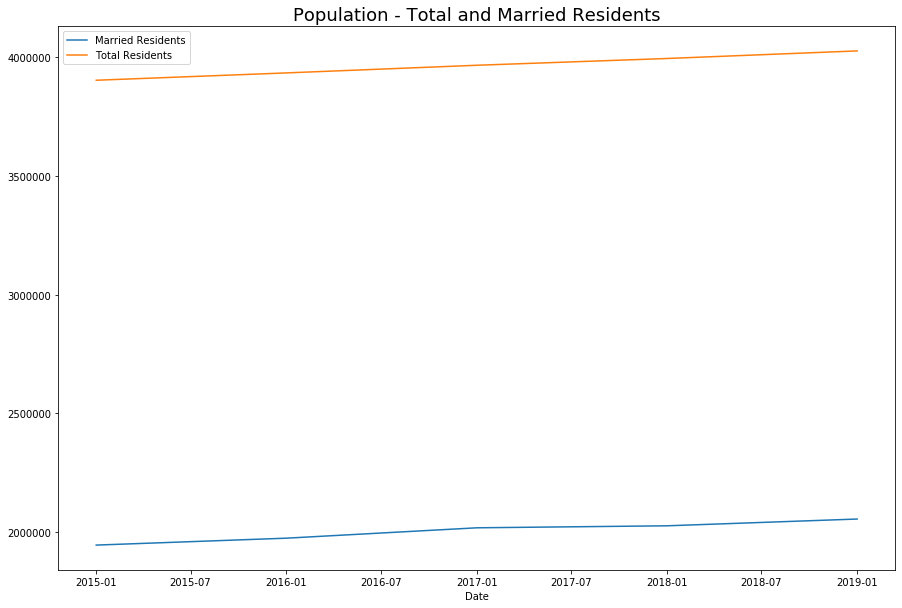

In [230]:
plt.figure(figsize=(15,10))

plt.plot(married_df[married_df['year']>2014]['married'], label="Married Residents")
plt.plot(pop_df[pop_df['year']>2014]['total_residents'], label="Total Residents")

plt.xlabel('Date')
plt.title(label = 'Population - Total and Married Residents', fontsize=18)
plt.legend()
plt.show();

### Home Price Indices

In [222]:
hdb_index_df.set_index('date',inplace=True)
pte_index_df.set_index('date',inplace=True)

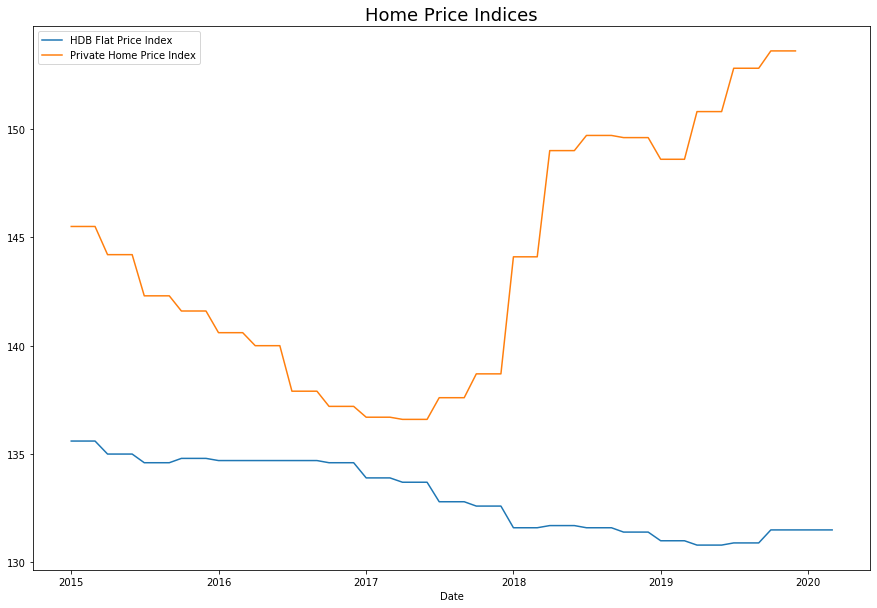

In [225]:
plt.figure(figsize=(15,10))

plt.plot(hdb_index_df[hdb_index_df['year']>2014]['hdb_index'], label="HDB Flat Price Index")
plt.plot(pte_index_df[pte_index_df['year']>2014]['pte_index'], label="Private Home Price Index")

plt.xlabel('Date')
plt.title(label = 'Home Price Indices', fontsize=18)
plt.legend()
plt.show();

### Interest Rates

In [131]:
sibor_df.set_index('date',inplace=True)
cpf_df.set_index('date',inplace=True)

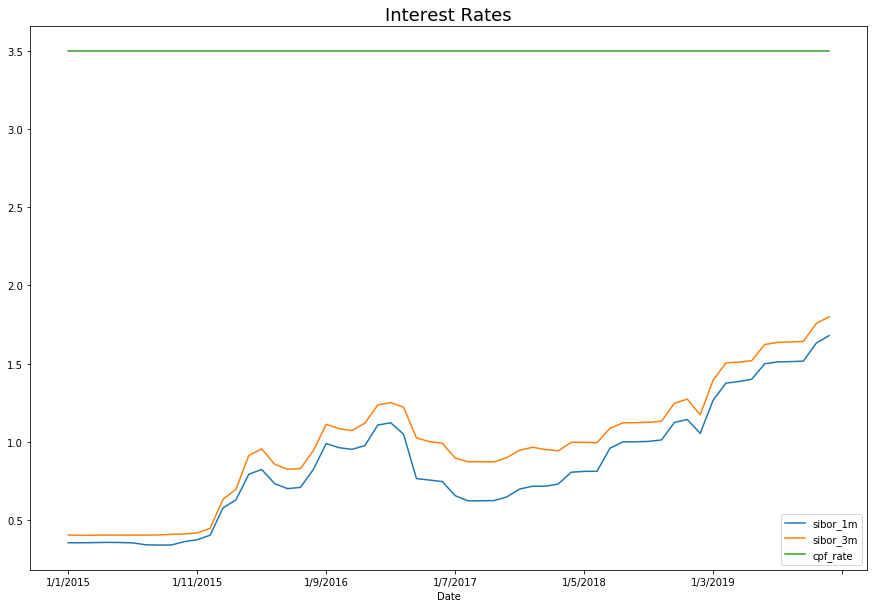

In [132]:
plt.figure(figsize=(15,10))

sibor_df[sibor_df['year']<2019]['sibor_1m'].plot()
sibor_df[sibor_df['year']<2019]['sibor_3m'].plot()
cpf_df[cpf_df['year']>2014]['cpf_rate'].plot()

#plt.xlim(datetime.date(2015,1,1),datetime.date(2019,12,1))
plt.xlabel('Date')
plt.title(label = 'Interest Rates', fontsize=18)
plt.legend()
plt.show();

### New Home Launches

In [ ]:
bto_df.set_index('year',inplace=True)
new_pte_df.set_index('year',inplace=True)

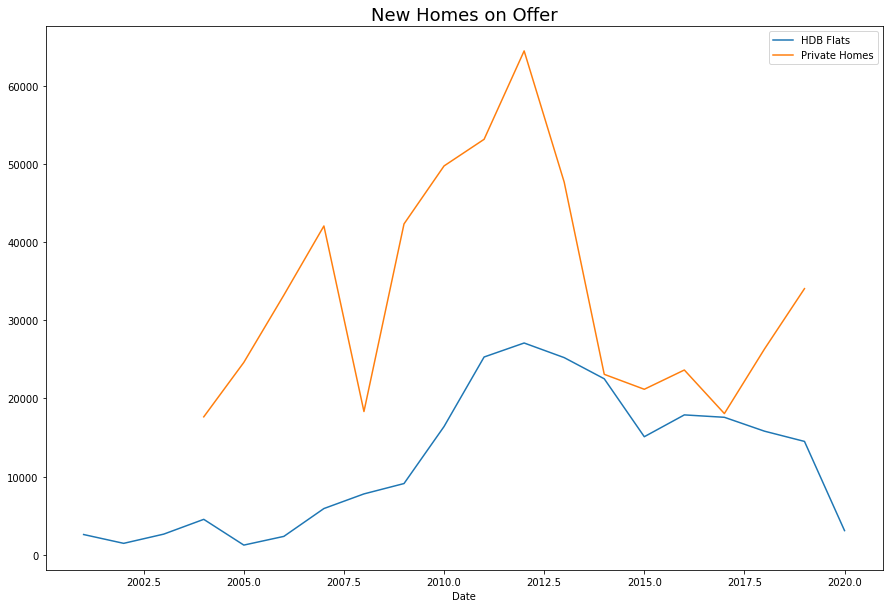

In [133]:
plt.figure(figsize=(15,10))

plt.plot(bto_df['new_flat_offered'], label="HDB Flats")
plt.plot(new_pte_df['new_pte_home_offered'], label="Private Homes")

#plt.ylabel('')
plt.xlabel('Date')
plt.title(label = 'New Homes on Offer', fontsize=18)
plt.legend()
plt.show();

### Key Economic Indicators

In [226]:
cpi_df.set_index('date',inplace=True)
cli_df.set_index('date',inplace=True)
pmi_df.set_index('date',inplace=True)
gdp_df.set_index('date',inplace=True)
unemp_df.set_index('date',inplace=True)

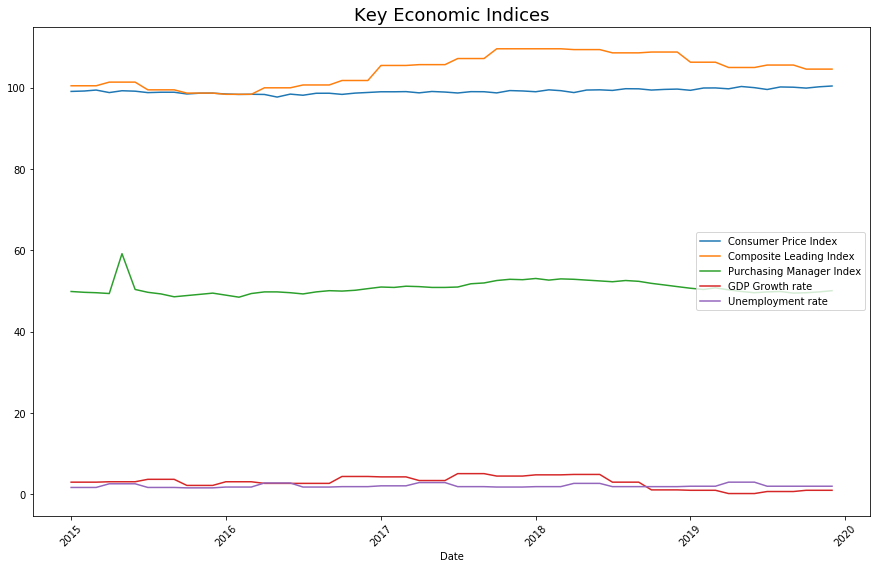

In [227]:
plt.figure(figsize=(15,9))
plt.plot(cpi_df[(cpi_df['year']>2014) & (cpi_df['year']<2020)]['cpi'], label="Consumer Price Index")
plt.plot(cli_df[(cli_df['year']>2014) & (cli_df['year']<2020)]['cli'], label="Composite Leading Index")
plt.plot(pmi_df[(pmi_df['year']>2014) & (pmi_df['year']<2020)]['pmi'], label="Purchasing Manager Index")
plt.plot(gdp_df[(gdp_df['year']>2014) & (gdp_df['year']<2020)]['gdp_growth'], label="GDP Growth rate")
plt.plot(unemp_df[(unemp_df['year']>2014) & (unemp_df['year']<2020)]['unemployed_rate'], label="Unemployment rate")

plt.xticks(Rotation='45')

#plt.ylabel('')
plt.xlabel('Date')
plt.title(label = 'Key Economic Indices', fontsize=18)
plt.legend()
plt.show();